**01- Load a dataset from a csv file**

In [12]:
import numpy as np
import pandas as pd

Data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/curcumin/main/PubChem_compound_list.csv')
Data

,cmpdname,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,isosmiles,exactmass,monoisotopicmass,xlogp
0,1-Aminopropan-2-ol,75.11,46.2,5,2,2,1,CC(CN)O,75.0684,75.0684,-1.0
1,"1-Chloro-2,4-dinitrobenzene",202.55,91.6,13,0,4,0,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,201.9780,201.9780,2.3
2,"1,2-Dichloroethane",98.96,0.0,4,0,0,1,C(CCl)Cl,97.9690,97.9690,1.5
3,"1,2,4-Trichlorobenzene",181.40,0.0,9,0,0,0,C1=CC(=C(C=C1Cl)Cl)Cl,179.9300,179.9300,4.0
4,"2,3-Dihydroxybenzoic acid",154.12,77.8,11,3,4,1,C1=CC(=C(C(=C1)O)O)C(=O)O,154.0270,154.0270,1.2
...,...,...,...,...,...,...,...,...,...,...,...
22033,"2-[(4R,5S,7R,9R,11E,13Z,16R)-6-[(2S,3R,4R,5S,6...",843.10,195.0,59,4,16,11,C[C@@H]1C/C=C\C=C\C([C@@H](C[C@@H](C([C@H]([C@...,842.5140,842.5140,2.1
22034,"sodium;(E,3R,5S)-3,5-dihydroxy-7-[2-[methyl(me...",507.50,152.0,34,2,10,10,[2H]C1=C(C(=C(C(=C1C2=C(C(=NC(=N2)N(C)S(=O)(=O...,507.1750,507.1750,NaN
22035,"(2E)-5-[(1S,7S,8S,9R)-7-acetyloxy-4-methoxycar...",432.50,116.0,31,1,8,7,C/C(=C\C=C[C@@]1([C@@H]2CC[C@]3([C@@]2(CCC(=CC...,432.1780,432.1780,2.3
22036,"(1R,4S,6S,7E,15R,17R)-N-cyclopropylsulfonyl-17...",749.90,194.0,52,2,10,8,CC1=C(C=CC2=C1N=C(C=C2O[C@@H]3C[C@@H]4[C@@H](C...,749.2920,749.2920,4.8


In [13]:
Data.info() #Print the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22038 entries, 0 to 22037
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cmpdname          22038 non-null  object 
 1   mw                22038 non-null  float64
 2   polararea         22038 non-null  float64
 3   heavycnt          22038 non-null  int64  
 4   hbonddonor        22038 non-null  int64  
 5   hbondacc          22038 non-null  int64  
 6   rotbonds          22038 non-null  int64  
 7   isosmiles         22038 non-null  object 
 8   exactmass         22038 non-null  float64
 9   monoisotopicmass  22038 non-null  float64
 10  xlogp             21697 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.8+ MB


**02- Clean the dataset**

In [14]:
Data = Data.drop_duplicates() #drop duplicates
Data = Data.dropna() #drop rows with missing values
Dataclean = Data.dropna(axis=1) #drop columns with missing values

#exactmass and monoisotopicmass are the same as mw, so drop them
#xlogp is the target column, so drop it
#cmpdname and isosmiles are not needed for the model, so drop them
Dataclean = Dataclean.drop(['cmpdname','isosmiles','exactmass','monoisotopicmass'],axis=1) #drop unwanted columns
Dataclean = Dataclean.drop(['xlogp'], axis=1) #drop target columns

Dataclean = Dataclean.reset_index(drop=True) #reset index
Dataclean = Dataclean.rename(columns={'mw':'MolWeight','polararea':'PolarArea','heavycnt':'HeavyCNT','hbonddonor':'HDonor','rotbonds':'RotBonds','hbondacc':'HAcc'}) #rename column

Dataclean.info()
Dataclean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MolWeight  21697 non-null  float64
 1   PolarArea  21697 non-null  float64
 2   HeavyCNT   21697 non-null  int64  
 3   HDonor     21697 non-null  int64  
 4   HAcc       21697 non-null  int64  
 5   RotBonds   21697 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1017.2 KB


,MolWeight,PolarArea,HeavyCNT,HDonor,HAcc,RotBonds
0,75.11,46.2,5,2,2,1
1,202.55,91.6,13,0,4,0
2,98.96,0.0,4,0,0,1
3,181.40,0.0,9,0,0,0
4,154.12,77.8,11,3,4,1
...,...,...,...,...,...,...
21692,1030.30,242.0,73,4,16,11
21693,843.10,195.0,59,4,16,11
21694,432.50,116.0,31,1,8,7
21695,749.90,194.0,52,2,10,8


**03- Plot correlation matrix**

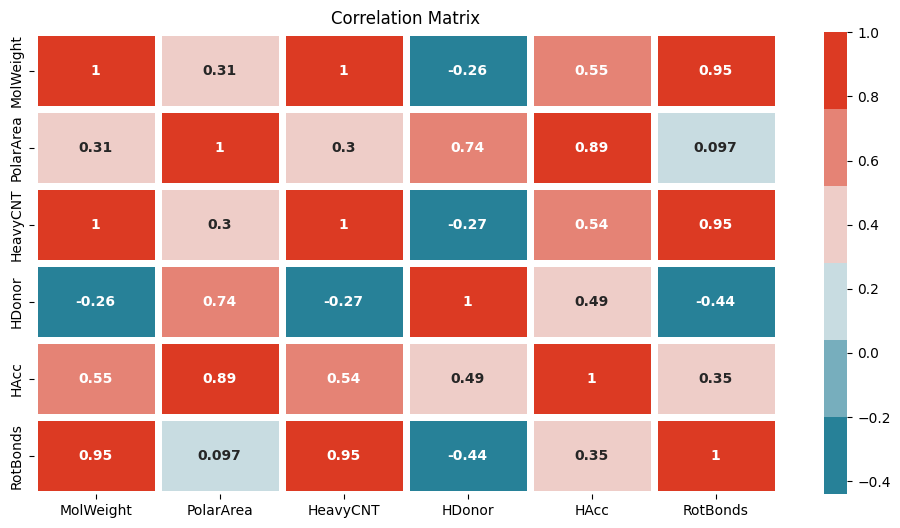

In [15]:
Dataclean.corr() #correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

Datacleancorr = Dataclean.corr() 
plt.figure(figsize=(12,6)) #set figure size
palette = sns.diverging_palette(220,15, s=90) #set color palette
sns.heatmap(Datacleancorr, annot=True, annot_kws={'fontweight':'bold'}, linewidths=5, cmap=palette) #plot heatmap
plt.title('Correlation Matrix') #set title
plt.show()

**04- Run several regression models**

Model: LinearRegression
MSE: 0.6125767866624232
MAE: 0.47290695689787693
R2: 0.9943839187216423

Model: RandomForestRegressor
MSE: 0.34573899069082004
MAE: 0.2972783084603251
R2: 0.996830277746246

Model: SVR
MSE: 3.4259119677136702
MAE: 1.4310930473283328
R2: 0.96859136604244

        MSE       MAE        R2                  Model
0  0.612577  0.472907  0.994384       LinearRegression
1  0.345739  0.297278  0.996830  RandomForestRegressor
2  3.425912  1.431093  0.968591                    SVR


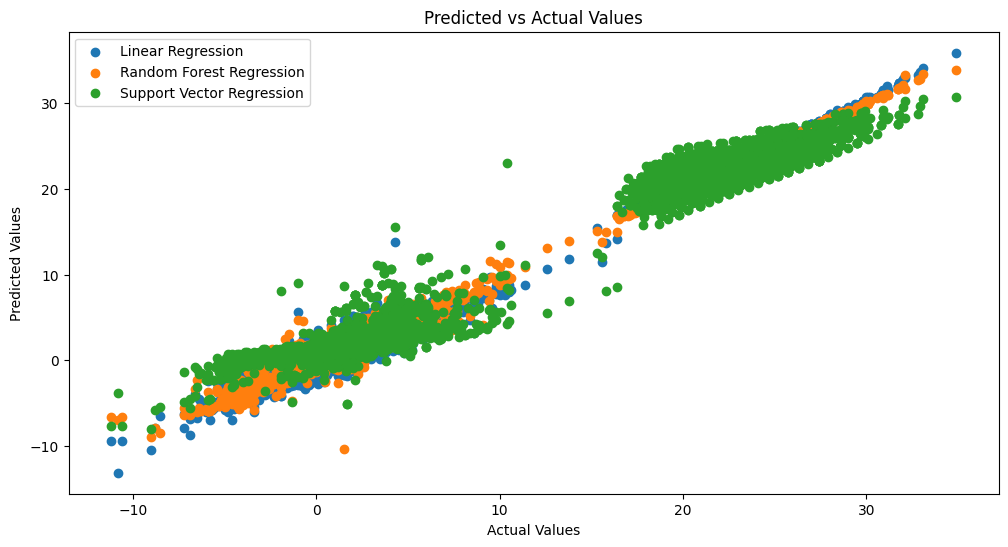

In [25]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the models
models = [LinearRegression(), LogisticRegression(), RandomForestRegressor(), SVR(), PolynomialFeatures()]

# Define X and y
X = Dataclean #define X
y = Data['xlogp'] #define y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a PolynomialFeatures object
poly = PolynomialFeatures(degree=2)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a list of regression models to run
models = [
    LinearRegression(),
    RandomForestRegressor(),
    SVR()
]

# Fit the models to the training data
for model in models:
    model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_preds = []
for model in models:
    y_preds.append(model.predict(X_test_poly))

# Calculate the MSE, MAE, and R2 score for each model
metrics = []
for y_pred in y_preds:
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append([mse, mae, r2])

# Print the MSE, MAE, and R2 score for each model
for i in range(len(models)):
    print(f'Model: {models[i].__class__.__name__}')
    print(f'MSE: {metrics[i][0]}')
    print(f'MAE: {metrics[i][1]}')
    print(f'R2: {metrics[i][2]}')
    print()

# Create a Pandas DataFrame to store the results
table = pd.DataFrame(metrics, columns=["MSE", "MAE", "R2"])

# Add a column to the DataFrame to store the model names
table["Model"] = [model.__class__.__name__ for model in models]

# Print the DataFrame in a table format
print(table.to_string())

# Visualize the results (scatter plot)
plt.figure(figsize=(12,6)) #set figure size
plt.scatter(y_test, y_preds[0], label='Linear Regression') #plot scatter plot
plt.scatter(y_test, y_preds[1], label='Random Forest Regression') #plot scatter plot
plt.scatter(y_test, y_preds[2], label='Support Vector Regression') #plot scatter plot
plt.xlabel('Actual Values') #set x label
plt.ylabel('Predicted Values') #set y label
plt.title('Predicted vs Actual Values') #set title
plt.legend() #set legend
plt.show()

**05- Run the algorythm and display the evaluation metrics for regression**

*R2 Score, MSE and MAE Comparison included in the scatter plot legend*

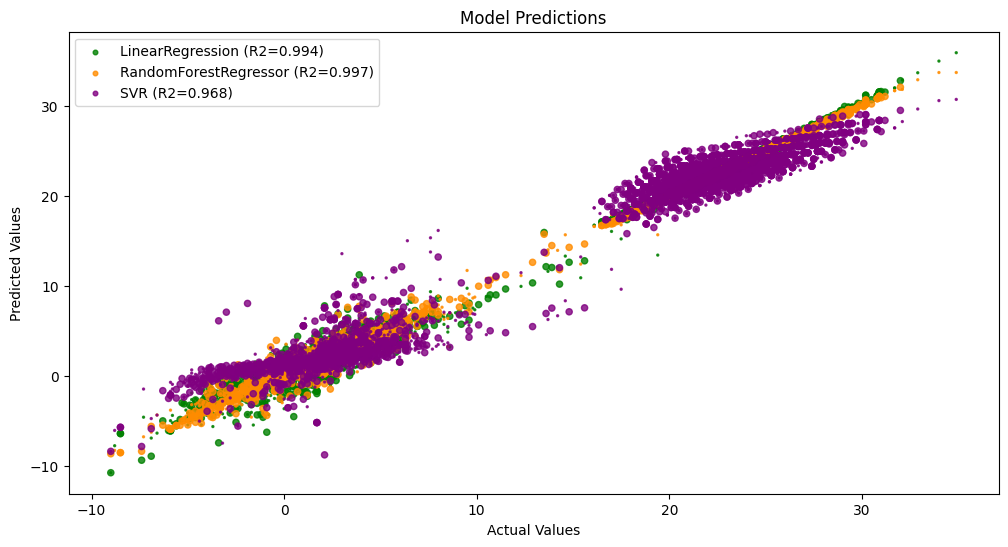

In [17]:

# Visualize the results (scatter plot)
plt.figure(figsize=(12,6)) #set figure size

# Create a scatter plot for each model
colors = ["green", "darkorange","purple"]
for i in range(len(models)):
    model = models[i]
    y_pred = y_preds[i]
    color = colors[i]
    plt.scatter(y_test, y_pred, c=color, label=f"{model.__class__.__name__} (R2={table.loc[i, 'R2']:.3f})", alpha=0.8,sizes=(2, 20),linewidths=1)

# Add a legend with the model names and R2 scores
plt.legend()

# Set the title, plt size and labels for the plot
plt.title("Model Predictions")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Show the plot
plt.show()

**06- Hyperparameter**

*Used this script to identify the default hyperparameters using in the imported alogorithms*

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Create instances of the regression models and feature transformation
lin_reg = LinearRegression()
svr = SVR()
random_forest = RandomForestRegressor()

# Get default hyperparameters
default_lin_reg_params = lin_reg.get_params()
default_svr_params = svr.get_params()
default_random_forest_params = random_forest.get_params()

# Print the default hyperparameters of all models in a dataframe
pd.DataFrame(
    [default_lin_reg_params, default_svr_params, default_random_forest_params], 
    index=["Linear Regression", "Support Vector Regression", "Random Forest"]
    ).T

,Linear Regression,Support Vector Regression,Random Forest
copy_X,True,NaN,NaN
fit_intercept,True,NaN,NaN
n_jobs,NaN,NaN,NaN
positive,False,NaN,NaN
C,NaN,1.0,NaN
cache_size,NaN,200.0,NaN
coef0,NaN,0.0,NaN
degree,NaN,3.0,NaN
epsilon,NaN,0.1,NaN
gamma,NaN,scale,NaN


**Change the Hyperparameters to find the Best Values for Linear Model**

*Tried to optimize the scrip to find the best parameters by stepping down the for loop to run for all three models at once and could managed to run the best parameters with the linear model and get the metrics values*

In [57]:
#get the best hyperparameters for Linear Regression model
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters for Linear Regression model
lin_reg_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, 2, 3, 4],
    'positive': [True, False]
}

# Create a GridSearchCV object for Linear Regression model
lin_reg_grid_search = GridSearchCV(estimator=lin_reg, param_grid=lin_reg_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
lin_reg_grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters for Linear Regression model
lin_reg_best_params = lin_reg_grid_search.best_params_

# Print the best hyperparameters for Linear Regression model vertically
print()
print("Best Hyperparameters for Linear Regression:")
for param, value in lin_reg_best_params.items():
    print(f"{param}: {value}")

#R2 score for Linear Regression model with this hyperparameters
lin_reg_best = LinearRegression(**lin_reg_best_params)

# Fit the model to the training data
lin_reg_best.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_lin_reg_best = lin_reg_best.predict(X_test_poly)

# Calculate the MSE, MAE, and R2 score for the model
mse_lin_reg_best = mean_squared_error(y_test, y_pred_lin_reg_best)
mae_lin_reg_best = mean_absolute_error(y_test, y_pred_lin_reg_best)
r2_lin_reg_best = r2_score(y_test, y_pred_lin_reg_best)

# Print the MSE, MAE, and R2 score for the model in a dataframe
pd.DataFrame({'Linear Regression': [mse_lin_reg_best, mae_lin_reg_best, r2_lin_reg_best]}, index=['MSE', 'MAE', 'R2'])


Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best Hyperparameters for Linear Regression:
copy_X: True
fit_intercept: True
n_jobs: None
positive: False


,Linear Regression
MSE,0.612577
MAE,0.472907
R2,0.994384


**Change the Hyperparameters to find the Best Values for SVR Model**

*Did not run the script here since it took more than 20 minutes to run in my machine and crash after that. The script written as same as the linear model*

In [ ]:
#get the best hyperparameters for SVR model
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters for SVR model
svr_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.1, 0.2, 0.3]
}

# Create a GridSearchCV object for SVR model
svr_grid_search = GridSearchCV(estimator=svr, param_grid=svr_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
svr_grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters for SVR model
svr_best_params = svr_grid_search.best_params_

# Print the best hyperparameters for SVR model vertically
print()
print("Best Hyperparameters for SVR:")
for param, value in svr_best_params.items():
    print(f"{param}: {value}")

#R2 score for SVR model with this hyperparameters
svr_best = SVR(**svr_best_params)

# Fit the model to the training data
svr_best.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_svr_best = svr_best.predict(X_test_poly)

# Calculate the MSE, MAE, and R2 score for the model
mse_svr_best = mean_squared_error(y_test, y_pred_svr_best)
mae_svr_best = mean_absolute_error(y_test, y_pred_svr_best)
r2_svr_best = r2_score(y_test, y_pred_svr_best)

# Print the MSE, MAE, and R2 score for the model in a dataframe
pd.DataFrame({'SVR': [mse_svr_best, mae_svr_best, r2_svr_best]}, index=['MSE', 'MAE', 'R2'])

**Change the Hyperparameters to find the Best Values for RandomForest Model**

*Did not run the script here since it took more than 20 minutes to run in my machine and crash after that. The script written as same as the linear model*

In [ ]:
#get the best hyperparameters for Random Forest Regression model
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters for Random Forest Regression model
random_forest_grid = {
    'n_estimators': [ 10, 100, 1000],
    'bootstrap': [True, False],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error'],
}

# Create a GridSearchCV object for Random Forest Regression model
random_forest_grid_search = GridSearchCV(estimator=random_forest, param_grid=random_forest_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
random_forest_grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters for Random Forest Regression model
random_forest_best_params = random_forest_grid_search.best_params_

# Print the best hyperparameters for Random Forest Regression model vertically
print()
print("Best Hyperparameters for Random Forest Regression:")
for param, value in random_forest_best_params.items():
    print(f"{param}: {value}")

#R2 score for Random Forest Regression model with this hyperparameters
random_forest_best = RandomForestRegressor(**random_forest_best_params)

# Fit the model to the training data
random_forest_best.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_random_forest_best = random_forest_best.predict(X_test_poly)

# Calculate the MSE, MAE, and R2 score for the model
mse_random_forest_best = mean_squared_error(y_test, y_pred_random_forest_best)
mae_random_forest_best = mean_absolute_error(y_test, y_pred_random_forest_best)
r2_random_forest_best = r2_score(y_test, y_pred_random_forest_best)

# Print the MSE, MAE, and R2 score for the model in a dataframe
pd.DataFrame({'Random Forest Regression': [mse_random_forest_best, mae_random_forest_best, r2_random_forest_best]}, index=['MSE', 'MAE', 'R2'])

**07- Feature selection by Anova Score**

*Top 6 Features of the model is selected by increasing it using f_Classif since it was not showing any variance in metrics when the script runs for top 3 features. Top 6 features bearly managed show slight variance in RandomForest Regression in R2 Score*

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define X and y
X = Dataclean #define X
y = Data['xlogp'] #define y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a PolynomialFeatures object
poly = PolynomialFeatures(degree=2)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a SelectKBest object to select the best 6 features using ANOVA feature selection
selector = SelectKBest(f_classif, k=6)

# Select the best 3 features from the training data
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

# Get the indices of the selected features
selected_features = poly.get_feature_names_out()[selector.get_support()]

# Print anova scores for the selected features in dataframe with feature names descending by score
anova_scores = pd.DataFrame({'Feature': selected_features, 'ANOVA Score': selector.scores_[selector.get_support()]})
anova_scores.sort_values(by='ANOVA Score', ascending=False)


c:\Users\Chamod Peiris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Chamod Peiris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Feature,ANOVA Score
5,RotBonds^2,10130.807918
0,RotBonds,4435.515399
1,MolWeight RotBonds,2641.523655
3,HeavyCNT RotBonds,2431.326739
4,HAcc RotBonds,699.531342
2,HeavyCNT^2,376.808328


**Train model again with Feature Selection and compare the Metrics**

In [126]:
# Create a models dictionary to store the regression models
models = {}

# Create instances of the regression models to run with and without feature selection
models['Linear Regression'] = LinearRegression()
models['Linear Regression with Feature Selection'] = LinearRegression()
models['Random Forest Regression'] = RandomForestRegressor()
models['Random Forest Regression with Feature Selection'] = RandomForestRegressor()
models['Support Vector Regression'] = SVR()
models['Support Vector Regression with Feature Selection'] = SVR()

# Fit the models to the training data
for model in models.values():
    model.fit(X_train_poly, y_train)

# Create a list to store the predictions
y_preds = []

# Make predictions on the test data
for model in models.values():
    y_preds.append(model.predict(X_test_poly))

# Create a list to store the MSE, MAE, and R2 scores for each model
metrics = []

# Calculate the MSE, MAE, and R2 score for each model
for y_pred in y_preds:
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append([mse, mae, r2])

# Print the MSE, MAE, and R2 score for each model in a dataframe with model names
pd.DataFrame(metrics, columns=['MSE', 'MAE', 'R2'], index=models.keys())

,MSE,MAE,R2
Linear Regression,0.649587,0.473026,0.994076
Linear Regression with Feature Selection,0.649587,0.473026,0.994076
Random Forest Regression,0.367626,0.307569,0.996647
Random Forest Regression with Feature Selection,0.375775,0.308640,0.996573
Support Vector Regression,3.739972,1.452473,0.965892
Support Vector Regression with Feature Selection,3.739972,1.452473,0.965892
